In [1]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../../')
%run setup.py install
os.chdir(owd)

In [2]:
%matplotlib inline
import numpy as np
import pyross
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
M0  = 16  ## number of age-groups

Ni0 = pyross.utils.getPopulation("India", M0)

# Get individual contact matrices
CH0, CW0, CS0, CO0 = pyross.contactMatrix.India()

M=4; Ni=np.zeros(M)
for i in range(M):
    Ni[i] = np.sum(Ni0[i*4:(i+1)*4])
    
    
CH, CW, CS, CO = pyross.utils.get_summed_CM(CH0, CW0, CS0, CO0, M, M0, Ni, Ni0)
cont11 =  (CH + CS + CW+ CO)
CM =  (CH + CS + CW+ CO)
N=np.sum(Ni)

14.302405676798289


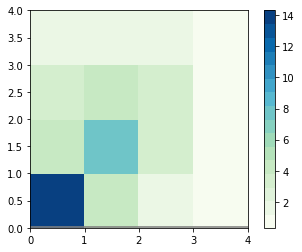

In [4]:
for i in range(4):
    CM[i,:]=CM[i,:]/Ni[i]

c11 = CM
# get new population for two kind of spreaders
Ni1 = Ni

def contactMatrix(t):
    return CM
plt.pcolor(CM, cmap=plt.cm.get_cmap('GnBu', 16)); plt.axis('square'); plt.colorbar()

M=4
beta  = 0.0274           # probability of infection on contact 
gIa   = 1./14            # removal rate of asymptomatic infectives 
gE    = 1/4.72          # removal rate of exposeds
gIs   = 1./14            # removal rate of symptomatic infectives 
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics


# initial conditions    
Is_0 = np.zeros((M));  Is_0[0:4]=2; 
Ia_0 = np.zeros((M))
E_0 = np.zeros((M)); E_0[0:4]=4; 
R_0  = np.zeros((M))
S_0  = Ni1 - (Ia_0 + Is_0 + R_0)


parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,'gE':gE,'fsa':fsa}
model = pyross.deterministic.SEIR(parameters, M, Ni1)


# start simulation
Tf, Nf = 200, 200; 
data0 =model.simulate(S_0, E_0, Ia_0, Is_0, contactMatrix, Tf, Nf)
IC0  = np.sum(model.Is(data0), axis=1)/N
plt.plot(IC0, '-', lw=4, color='gray', label='case 1, rC=0.1', alpha=0.8)

print(np.max(CM))

## superSpreaders examples

6999685512.55608
6299716961.300472
440465548.5
14.30240567679829


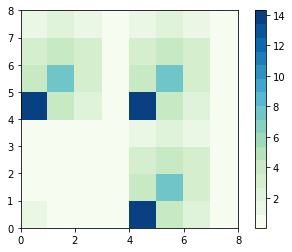

In [5]:

c11=cont11

rC = 0.1; brC = 1 - rC
a2 = brC#/rC
a1 = rC#/brC

GM=0.1

CM1 = np.concatenate((a1*c11, GM*c11), axis = 1)
CM2 = np.concatenate((GM*c11, a2*c11), axis = 1)
CM = np.concatenate((CM2, CM1), axis = 0)

# get new population for two kind of spreaders
Ni1 = np.zeros(8);  Ni1[0:4] = brC*Ni;   Ni1[4:8] = rC*Ni;
 
print(np.max(c11))
print(np.max(CM))
print(np.max(Ni1))

for i in range(8):
    CM[i,:]=CM[i,:]/Ni1[i]
    
plt.pcolor(CM, cmap=plt.cm.get_cmap('GnBu', 16)); plt.axis('square'); plt.colorbar()


    

    
def contactMatrix(t):
    return CM


M=8
beta  = 0.0274           # probability of infection on contact 
gIa   = 1./14            # removal rate of asymptomatic infectives 
gE    = 1/4.72          # removal rate of exposeds
gIs   = 1./14            # removal rate of symptomatic infectives 
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics


# initial conditions    
Is_0 = np.zeros((M));  Is_0[0:M]=1; 
Ia_0 = np.zeros((M))
E_0 = np.zeros((M)); E_0[0:]=2; 
R_0  = np.zeros((M))
S_0  = Ni1 - (Ia_0 + Is_0 + R_0)


parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,'gE':gE,'fsa':fsa}
model = pyross.deterministic.SEIR(parameters, M, Ni1)


# start simulation
Tf, Nf = 200, 200; 
data1 =model.simulate(S_0, E_0, Ia_0, Is_0, contactMatrix, Tf, Nf)

print(np.max(CM))

6999685512.55608
6299716961.300472
440465548.5
14.30240567679829


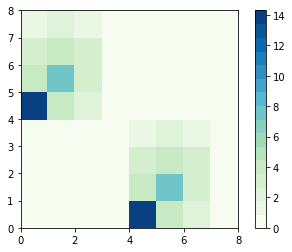

In [6]:

c11=cont11

rC = 0.1; brC = 1 - rC
a2 = brC#/rC
a1 = rC#/brC

GM=0

CM1 = np.concatenate((a1*c11, GM*c11), axis = 1)
CM2 = np.concatenate((GM*c11, a2*c11), axis = 1)
CM = np.concatenate((CM2, CM1), axis = 0)

# get new population for two kind of spreaders
Ni1 = np.zeros(8);  Ni1[0:4] = brC*Ni;   Ni1[4:8] = rC*Ni;
 
print(np.max(c11))
print(np.max(CM))
print(np.max(Ni1))

for i in range(8):
    CM[i,:]=CM[i,:]/Ni1[i]
    
plt.pcolor(CM, cmap=plt.cm.get_cmap('GnBu', 16)); plt.axis('square'); plt.colorbar()


    

    
def contactMatrix(t):
    return CM


M=8
beta  = 0.0274           # probability of infection on contact 
gIa   = 1./14            # removal rate of asymptomatic infectives 
gE    = 1/4.72          # removal rate of exposeds
gIs   = 1./14            # removal rate of symptomatic infectives 
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics


# initial conditions    
Is_0 = np.zeros((M));  Is_0[0:M]=1; 
Ia_0 = np.zeros((M))
E_0 = np.zeros((M)); E_0[0:]=2; 
R_0  = np.zeros((M))
S_0  = Ni1 - (Ia_0 + Is_0 + R_0)


parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,'gE':gE,'fsa':fsa}
model = pyross.deterministic.SEIR(parameters, M, Ni1)


# start simulation
Tf, Nf = 200, 200; 
data11 =model.simulate(S_0, E_0, Ia_0, Is_0, contactMatrix, Tf, Nf)

print(np.max(CM))

6999685512.55608
6299716961.300472
440465548.5
57.20962270719316


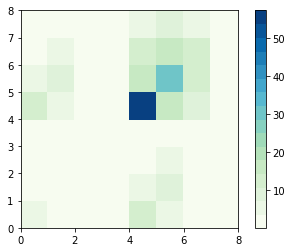

In [7]:

c11=cont11

rC = 0.1; brC = 1 - rC
a2 = brC#/rC
a1 = rC#/brC

GM=0.4

CM1 = np.concatenate((a1*c11, GM*c11), axis = 1)
CM2 = np.concatenate((GM*c11, a2*c11), axis = 1)
CM = np.concatenate((CM2, CM1), axis = 0)

# get new population for two kind of spreaders
Ni1 = np.zeros(8);  Ni1[0:4] = brC*Ni;   Ni1[4:8] = rC*Ni;
 
print(np.max(c11))
print(np.max(CM))
print(np.max(Ni1))

for i in range(8):
    CM[i,:]=CM[i,:]/Ni1[i]
    
plt.pcolor(CM, cmap=plt.cm.get_cmap('GnBu', 16)); plt.axis('square'); plt.colorbar()
    

    
def contactMatrix(t):
    return CM


M=8
beta  = 0.0274           # probability of infection on contact 
gIa   = 1./14            # removal rate of asymptomatic infectives 
gE    = 1/4.72          # removal rate of exposeds
gIs   = 1./14            # removal rate of symptomatic infectives 
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics


# initial conditions    
Is_0 = np.zeros((M));  Is_0[0:M]=1; 
Ia_0 = np.zeros((M))
E_0 = np.zeros((M)); E_0[0:]=2; 
R_0  = np.zeros((M))
S_0  = Ni1 - (Ia_0 + Is_0 + R_0)


parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,'gE':gE,'fsa':fsa}
model = pyross.deterministic.SEIR(parameters, M, Ni1)


# start simulation
Tf, Nf = 200, 200; 
data2 =model.simulate(S_0, E_0, Ia_0, Is_0, contactMatrix, Tf, Nf)

print(np.max(CM))

6999685512.55608
6999685512.55608
440465548.5
143.0240567679829


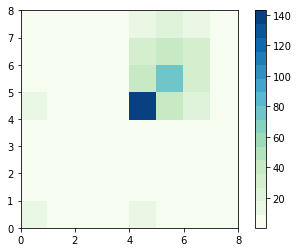

In [8]:

c11=cont11

rC = 0.1; brC = 1 - rC
a2 = brC#/rC
a1 = rC#/brC

GM=1

CM1 = np.concatenate((a1*c11, GM*c11), axis = 1)
CM2 = np.concatenate((GM*c11, a2*c11), axis = 1)
CM = np.concatenate((CM2, CM1), axis = 0)

# get new population for two kind of spreaders
Ni1 = np.zeros(8);  Ni1[0:4] = brC*Ni;   Ni1[4:8] = rC*Ni;
 
print(np.max(c11))
print(np.max(CM))
print(np.max(Ni1))

for i in range(8):
    CM[i,:]=CM[i,:]/Ni1[i]
    
plt.pcolor(CM, cmap=plt.cm.get_cmap('GnBu', 16)); plt.axis('square'); plt.colorbar()
    

    
def contactMatrix(t):
    return CM


M=8
beta  = 0.0274           # probability of infection on contact 
gIa   = 1./14            # removal rate of asymptomatic infectives 
gE    = 1/4.72          # removal rate of exposeds
gIs   = 1./14            # removal rate of symptomatic infectives 
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics


# initial conditions    
Is_0 = np.zeros((M));  Is_0[0:M]=1; 
Ia_0 = np.zeros((M))
E_0 = np.zeros((M)); E_0[0:]=2; 
R_0  = np.zeros((M))
S_0  = Ni1 - (Ia_0 + Is_0 + R_0)


parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,'gE':gE,'fsa':fsa}
model = pyross.deterministic.SEIR(parameters, M, Ni1)


# start simulation
Tf, Nf = 200, 200; 
data3 =model.simulate(S_0, E_0, Ia_0, Is_0, contactMatrix, Tf, Nf)

print(np.max(CM))

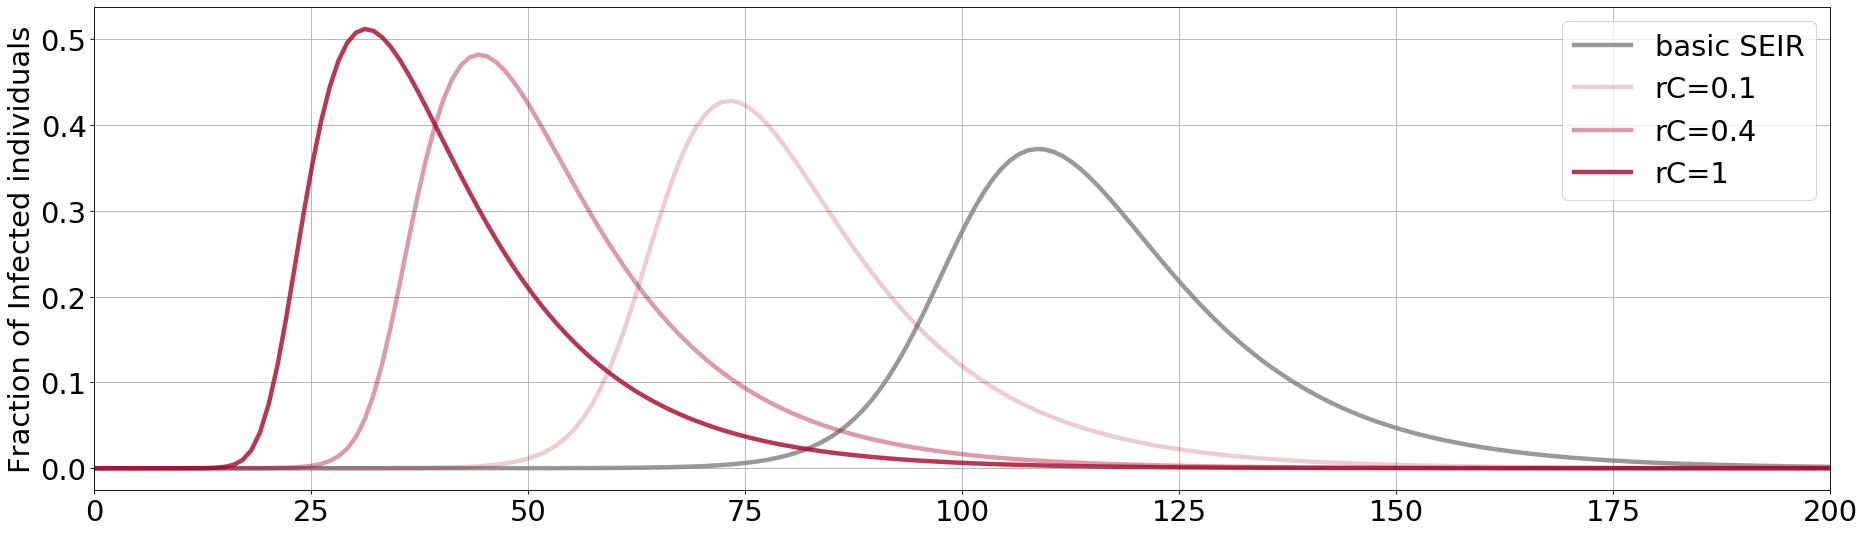

In [10]:
IC11  = np.sum(model.Is(data11), axis=1)/N
IC1  = np.sum(model.Is(data1), axis=1)/N
IC2  = np.sum(model.Is(data2), axis=1)/N
IC3  = np.sum(model.Is(data3), axis=1)/N

t = data1['t']; t1=int(Nf/(8))

fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 26})

plt.plot(t, IC0, '-', lw=4, color='gray', label='basic SEIR', alpha=0.8)
#plt.plot(t, IC11, '-', lw=4, color='#A60628', label='rC=0', alpha=0.1)
plt.plot(t, IC1, '-', lw=4, color='#A60628', label='rC=0.1', alpha=0.2)
plt.plot(t, IC2, '-', lw=4, color='#A60628', label='rC=0.4', alpha=0.4)
plt.plot(t, IC3, '-', lw=4, color='#A60628', label='rC=1', alpha=0.8)

 
plt.legend(fontsize=26, loc='upper right'); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Fraction of Infected individuals');
